# Econmic Model 3: Predict Retail with Year, Brent, ICO Composite
## Random Forest Decision Tree
This model employs a Random Forest Regressor Decision Tree algorithm to predict retail coffe price bassed on economic metrics such as  supply, trade, inventories, consumption, energy costs, and commodity pricing data. Data was obtained from International Coffee Organization (The ICO Historic Data).

### Goal
- Train model with Time and ICO spot price to predict retail price
- Three imputs: Year, Brent crude, ICO SPOT
- User input: Year + Brent crude + ICO Spot = Retial price (for year)
Example
 
 Enter        2021 (Year)
 
 Enter        100  (Annual Brent Crude)
 
 Enter        1.09 (ICO composite (USD $/lb))
 
 Output:      Average global retail price


### Scoring Metrics:
- Training Data Score: 0.9597823614739235
- Testing Data Score: 0.8959434042614792
- MSE:  0.12347079250000448
- RMSE:  0.06173539625000224

In [1]:
# Dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import tree
import os
import matplotlib.pyplot as plt

In [2]:
# Machine learning libraries
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# import processed data
path = "Trends/"
file = "finalFeatures.csv"
path_file = path + file
df = pd.read_csv(path_file)
df

,Year,Brent ave closing USD,Coffe Export (In 1K 60-kg bags) crop year,Coffe Imports (In 1K 60-kg bags) Calendar Year 137c,Coffe Produciton (In 1K 60-kg bags) crop year,Domestic Consumption (In 1K 60-kg bags),ICO composite (USD $/lb),Inventories (In 1K 60-kg bags),re-exports (In 1K 60-kg bags) Calendar Year 35c,WTI ave closing price USD,retail
0,1990,23.76,73887,100082,93230,19509,0.72,15619,8769,24.53,4.53
1,1991,20.04,79768,97310,101269,20228,0.67,13200,9770,21.54,4.48
2,1992,19.32,76957,103653,98523,20951,0.53,16843,10691,20.58,4.53
3,1993,17.01,74130,101530,91762,21098,0.62,14218,11041,18.43,4.03
4,1994,15.86,65962,100811,93314,21360,1.34,12667,12833,17.20,4.59
5,1995,17.02,74253,95216,87318,22603,1.38,7905,11539,18.43,6.03
6,1996,20.64,81884,103284,103306,23513,1.02,6494,12485,22.12,5.68
7,1997,19.11,77962,108001,99861,24271,1.34,6896,14136,20.61,5.35
8,1998,12.76,82872,109718,108892,25117,1.09,6601,15135,14.42,5.31
9,1999,17.90,92405,116301,131385,25741,0.86,8601,15331,19.35,4.83


In [4]:
df.shape

(29, 11)

In [5]:
three_features_df = df.drop(columns= ['Coffe Imports (In 1K 60-kg bags) Calendar Year 137c',
                                         're-exports (In 1K 60-kg bags) Calendar Year 35c',
                                         'Inventories (In 1K 60-kg bags)',
                                         'Coffe Export (In 1K 60-kg bags) crop year',
                                         'Coffe Produciton (In 1K 60-kg bags) crop year',
                                         'Domestic Consumption (In 1K 60-kg bags)',
                                         'WTI ave closing price USD'])

In [6]:
three_features_df.head()

,Year,Brent ave closing USD,ICO composite (USD $/lb),retail
0,1990,23.76,0.72,4.53
1,1991,20.04,0.67,4.48
2,1992,19.32,0.53,4.53
3,1993,17.01,0.62,4.03
4,1994,15.86,1.34,4.59


In [7]:
Years = df["Year"]
# needed for ploting final graph
# Years

In [8]:
# Create dataframe for running decision tree
# This was done to upload existing code with similar variables
# Main Data set: data_df

x = three_features_df.drop("retail", axis=1)
y = three_features_df["retail"]
target = y
data_df = x
print(x.shape)
print(y.shape)

(29, 3)
(29,)


### RandomForestRegressor

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [10]:
#from sklearn.ensemble import RandomForestRegressor
Econ_model_Three_Features = RandomForestRegressor(n_estimators=200)
Econ_model_Three_Features = Econ_model_Three_Features.fit(X_train, y_train)
Econ_model_Three_Features.score(X_test, y_test)

0.9139032560932375

In [11]:
print('Test Acc: %.3f' % Econ_model_Three_Features.score(X_test, y_test))

Test Acc: 0.914


In [12]:
print(f"Training Data Score: {Econ_model_Three_Features.score(X_train, y_train)}")
print(f"Testing Data Score: {Econ_model_Three_Features.score(X_test, y_test)}")

Training Data Score: 0.9561482047729232
Testing Data Score: 0.9139032560932375


In [13]:
#sorted(zip(Econ_model_twoFeatures.feature_importances_, feature_names), reverse=True)

In [14]:
# Model stats and needed for ploting first graph

In [15]:
ypred = Econ_model_Three_Features.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

# Taken from refrence
# Target MSE:  0.130713987032462
# Target RMSE:  0.065356993516231 

MSE:  0.10216010937500433
RMSE:  0.051080054687502166


In [16]:
print(f"train set shape: {y_test.shape}")
print(f"Test set shape:  {ypred.shape}")

train set shape: (8,)
Test set shape:  (8,)


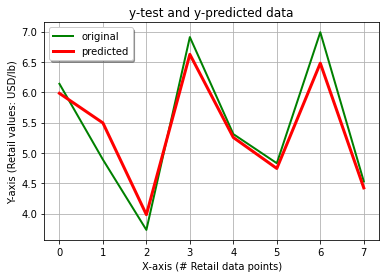

In [17]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=2, label="original", color ="green")
plt.plot(x_ax, ypred, linewidth=3.0, label="predicted", color = "red")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis (# Retail data points)')
plt.ylabel('Y-axis (Retail values: USD/lb)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [18]:
 # save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'z3_Economic_web_model_3_inputs.sav'
joblib.dump(Econ_model_Three_Features, filename)

['z3_Economic_web_model_3_inputs.sav']

In [19]:
# Set up for desired graph

In [20]:
y_pred_bs = Econ_model_Three_Features.predict(data_df)

In [21]:
data_df.head(1)

,Year,Brent ave closing USD,ICO composite (USD $/lb)
0,1990,23.76,0.72


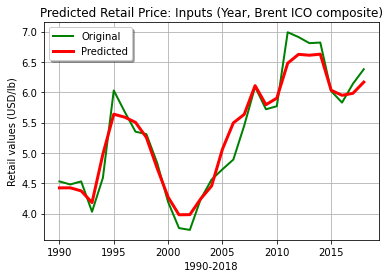

In [22]:
x_ax = Years
plt.plot(x_ax, target, linewidth=2, label="Original", color ="green")
plt.plot(x_ax, y_pred_bs, linewidth=3.0, label="Predicted", color = "red")
plt.title("Predicted Retail Price: Inputs (Year, Brent ICO composite)")

plt.xlabel('1990-2018')
plt.ylabel('Retail values (USD/lb)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.savefig('Econimic_model.png')
plt.show() 

In [23]:
print(f"Training Data Score: {Econ_model_Three_Features.score(X_train, y_train).round(decimals=4)}")
print(f"Testing Data Score: {Econ_model_Three_Features.score(X_test, y_test).round(decimals=4)}")

Training Data Score: 0.9561
Testing Data Score: 0.9139


# web model development

In [24]:
three_features_df.head(10)

,Year,Brent ave closing USD,ICO composite (USD $/lb),retail
0,1990,23.76,0.72,4.53
1,1991,20.04,0.67,4.48
2,1992,19.32,0.53,4.53
3,1993,17.01,0.62,4.03
4,1994,15.86,1.34,4.59
5,1995,17.02,1.38,6.03
6,1996,20.64,1.02,5.68
7,1997,19.11,1.34,5.35
8,1998,12.76,1.09,5.31
9,1999,17.90,0.86,4.83


In [25]:
input_test_1 = three_features_df.head(1)
User_Test_df = (input_test_1).drop("retail", axis=1)
input_test_1

,Year,Brent ave closing USD,ICO composite (USD $/lb),retail
0,1990,23.76,0.72,4.53


### Enter data below to test model

In [26]:
# Enter data hear to test model
#print(User_Test_df.dtypes)
test_model_data = (1999, 17.90, 0.86)
test_model_data

(1999, 17.9, 0.86)

In [27]:
user_test_data = np.array([[test_model_data]])

In [28]:
test_outpout = Econ_model_Three_Features.predict(User_Test_df)

In [29]:
print(f"Input (Year: Brent: ICO spot): {test_model_data}")
print(f"Predicted Retail Price: {test_outpout} USD/LB")

Input (Year: Brent: ICO spot): (1999, 17.9, 0.86)
Predicted Retail Price: [4.42315] USD/LB
